In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
arr = np.random.randn(1000)

In [13]:
print(arr.shape)

(1000,)


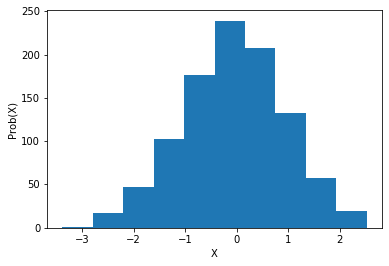

In [19]:
plt.hist(arr,bins=10)
plt.xlabel("X")
plt.ylabel("Prob(X)")
plt.show()

In [15]:
np.mean(arr)

-0.05289139511350753

In [16]:
np.std(arr)

0.981495298420777

In [31]:
marks = np.random.randn(1000)*10 + 60


In [32]:
np.mean(marks)

60.41618818969369

In [33]:
np.std(marks)

9.998247514032629

## Normal Distribution & Standard Normal Distribution

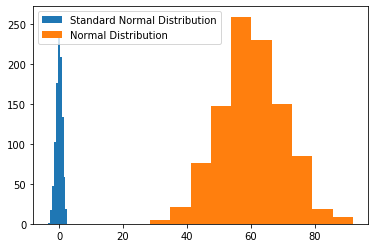

In [35]:
plt.hist(arr,bins=10,label="Standard Normal Distribution")
plt.hist(marks,bins=10,label="Normal Distribution")
plt.legend()
plt.show()

## Multivariate Normal Distribution

In [58]:
# Sweetness & Nutrition
apples_data = np.random.multivariate_normal(mean=[5,7],cov=[[3,0.5],[0.5,1.2]],size=1000)
oranges_data = np.random.multivariate_normal(mean=[10,12],cov=[[2,-1.5],[-1.5,1.9]],size=800)


In [59]:
print(apples_data[:5,:])

[[1.17848131 5.5008567 ]
 [3.94169049 6.40514219]
 [4.74118883 7.16280638]
 [4.51702285 5.95113752]
 [2.82556503 7.84518407]]


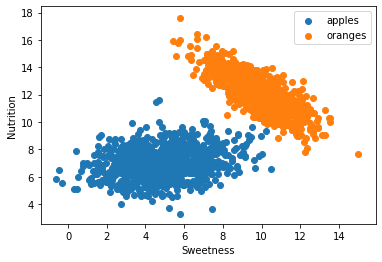

In [60]:
plt.scatter(apples_data[:,0],apples_data[:,1],label='apples')
plt.scatter(oranges_data[:,0],oranges_data[:,1],label='oranges')
plt.xlabel("Sweetness")
plt.ylabel("Nutrition")
plt.legend()
plt.show()

### Data Preparation

In [62]:
total_fruits = apples_data.shape[0] + oranges_data.shape[0]

In [63]:
print(total_fruits)

1800


In [65]:
X = np.zeros((total_fruits,3))
print(X.shape)

(1800, 3)


In [69]:
X[:1000,:-1] = apples_data
X[1000:,:-1] = oranges_data
X[1000:,-1] = 1

In [70]:
print(X)

[[ 1.17848131  5.5008567   0.        ]
 [ 3.94169049  6.40514219  0.        ]
 [ 4.74118883  7.16280638  0.        ]
 ...
 [11.11378793 11.46685214  1.        ]
 [ 9.5545948  11.25953194  1.        ]
 [ 9.72676577 11.60524831  1.        ]]


In [71]:
X_Values = X[:,:-1]
Y_Values = X[:,-1]

print(X_Values.shape)
print(Y_Values.shape)

(1800, 2)
(1800,)


In [75]:
test_fruit = np.array([7,11])

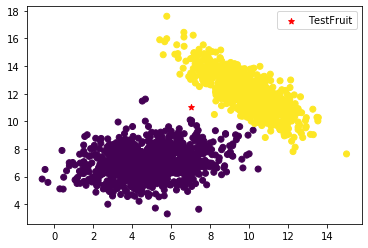

In [78]:
plt.scatter(test_fruit[0],test_fruit[1],color='red',marker='*',label='TestFruit')
plt.scatter(X_Values[:,0],X_Values[:,1],c=Y_Values)
plt.legend()
plt.show()

In [90]:
def distance(p1,p2):
    return np.sum((p2 - p1)**2)**.5

In [122]:
def knn(X,Y,test,k=5):
    m = X.shape[0]
    
    d = []
    for i  in range(m):
        dist = distance(test,X[i])
        d.append((dist,Y[i]))
    
    d = np.array(sorted(d))[:,1]
    d = d[:k]
    t =  np.unique(d,return_counts=True)
    idx = np.argmax(t[1])
    pred = int(t[0][idx])
    
    if pred==0:
        return "Apple"
    else:
        return "orange"
    
        

In [125]:
knn(X_Values,Y_Values,test=np.array([12,14]))

'orange'

In [115]:
arry = np.array([1,2,3,4,5,5,3,3,7,3])
np.argmax(arry)

8

In [116]:
t  = np.unique(arry,return_counts=True)
print(t)

(array([1, 2, 3, 4, 5, 7]), array([1, 1, 4, 1, 2, 1], dtype=int64))


In [121]:
t[0][np.argmax(t[1])]

3